In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import re

import warnings
warnings.filterwarnings('ignore')

# 1. Import du fichier erp

preparation du fichier :

In [42]:
# Import du fichier info : 
erp = pd.read_excel('erp.xlsx')

# Affichage des informations importantes sur le dataframe
print(erp.info(), '\n')

# Affichage du nombres de valeurs nulles sur chaque colonne, il n'a pas de valeurs nulles dans la table
print(erp.isnull().sum(), '\n')

# Affichage du nombre de valeurs unique sur chaque colonne
print(erp.nunique(), '\n')

# Affichage des lignes duplicates, il n'y a pas de duplicates dans la table
print(erp.duplicated(keep=False).sum(), '\n')

# Affichage de la description de la table
display(erp.describe())

# Vérification de la clé primaire
print(erp.nunique() == erp.shape[0])

# Affichage des premiers 5 lignes de la table
display(erp.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB
None 

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64 

product_id        825
onsale_web          2
price             381
stock_quantity    128
stock_status        2
dtype: int64 

0 



,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


product_id         True
onsale_web        False
price             False
stock_quantity    False
stock_status      False
dtype: bool


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


# 2. Import du fichier liaison

preparation du fichier :

In [43]:
# Import du fichier liaison
liaison = pd.read_excel('liaison.xlsx')

# Affichage des info sur la table, observation : la colonne id_web n'a que 734 valeurs, elle a des valeurs manquantes
print(liaison.info(), '\n')

# Affichage du nombre de valeurs nulles sur chaque colonne, 91 lignes ou la valeur de id_web est nul
print(liaison.isnull().sum(), '\n')

# Affichage du nombre de duplicates sur les lignes, il n'y a pas des lignes duplicates dans la tables
print(liaison.duplicated(keep=False).sum(), '\n')

# Affichage le nombres des valers unique sur chaque colonne
print(liaison.nunique(), '\n')

# Affichage de la description de la table
print(liaison.describe(), '\n')

# Verification de la colonne qui peut être clé primaire 
print(erp.nunique() == erp.shape[0], '\n')

# Affichage des premiers 5 lignes de la table
display(liaison.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None 

product_id     0
id_web        91
dtype: int64 

0 

product_id    825
id_web        734
dtype: int64 

        product_id
count   825.000000
mean   5162.597576
std     902.644635
min    3847.000000
25%    4348.000000
50%    4907.000000
75%    5805.000000
max    7338.000000 

product_id         True
onsale_web        False
price             False
stock_quantity    False
stock_status      False
dtype: bool 



,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Fusion des deux tables erp et liaison et analyse

In [44]:
# Fusion des deux tables en incluant toutes les enregistrements des deux tables 
erp_liaison = erp.merge(liaison, on='product_id', how='outer', indicator=True)

# Impression des valeurs de la colonne _merge
print(erp_liaison['_merge'].unique())

# Affichage du data frame de la fusion, premiere observation il y a des vins qui ne sont pas vendus sur le web(onsale_web = 0) mais qui sont en stock sur le stock affiché (stock_status = instock) et (stock_quantity > 0) 
display(erp_liaison)

# Verification de nombres de valeurs de la colonne onsale_web
erp_liaison.loc[(erp_liaison['_merge'] == 'both'), 'onsale_web'].nunique()

# Nous remarquons qu'il y a des vins qui aurait du être vendu sur internet et qui ne sont pas car onsale_web est 0 id id_web est NAN
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['onsale_web'] == 1)]
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['onsale_web'] == 0)]

# Certains vins qui sont en stock et qui sont censé a être venu sur le web mais qui ne sont pas
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['onsale_web'] == 0) & (erp_liaison['stock_quantity'] != 0) ]

# Certains vins qui sont vendu sur le web ne sont pas en stock 
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['onsale_web'] == 1) & (erp_liaison['stock_quantity'] == 0) ]

# Verifications des prix ou stock negatifs
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['price'] < 0) | (erp_liaison['stock_quantity'] < 0)]

# Verifications des valeurs sur la colonne id_web, observation que les donnes sont hétérogènes
mask = pd.to_numeric(liaison['id_web'], errors='coerce').isna()
liaison.loc[mask]

# Verification de la concordance des indicateurs instock et outofstock, un enregistrement avec stock_status = instock et stock_quantity = 0 
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['stock_status'] == 'instock') & (erp_liaison['stock_quantity'] == 0)]
erp_liaison.loc[(erp_liaison['_merge'] == 'both') & (erp_liaison['stock_status'] == 'outofstock') & (erp_liaison['stock_quantity'] != 0 )]

['both']
Categories (3, object): ['left_only', 'right_only', 'both']


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


2

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
787,6930,1,8.4,83,instock,16135,both
792,7023,1,27.5,15,instock,15891,both
793,7025,1,69.0,2,instock,15887,both
822,7247,1,54.8,23,instock,13127-1,both


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
19,4055,0,86.1,0,outofstock,NaN,both
49,4090,0,73.0,0,outofstock,NaN,both
50,4092,0,47.0,0,outofstock,NaN,both
119,4195,0,14.1,0,outofstock,NaN,both
131,4209,0,73.5,0,outofstock,NaN,both
...,...,...,...,...,...,...,...
818,7200,0,31.0,6,instock,NaN,both
819,7201,0,31.0,18,instock,NaN,both
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
234,4565,0,30.5,3,instock,NaN,both
238,4577,0,49.0,1,instock,NaN,both
239,4578,0,40.0,3,instock,NaN,both
318,4692,0,12.0,48,instock,NaN,both
320,4697,0,34.5,1,instock,NaN,both
...,...,...,...,...,...,...,...
818,7200,0,31.0,6,instock,NaN,both
819,7201,0,31.0,18,instock,NaN,both
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
731,6570,1,29.2,0,outofstock,15706,both
732,6572,1,44.0,0,outofstock,15704,both
735,6578,1,40.0,0,outofstock,15647,both
759,6751,1,46.5,0,outofstock,16144,both


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
819,7201,NaN
820,7203,NaN
821,7204,NaN
822,7247,13127-1


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
443,4954,1,25.0,0,instock,bon-cadeau-25-euros,both


,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge


# 3.1 Import du fichier web

preparation du fichier :

In [45]:
# Import du fichier web
web = pd.read_excel('web.xlsx')

# Affichage des informations sur la dataframe : 
# Il y a des valeurs manquantes sur certains colonnes tax_class, post_content, , post_password, post_content_filtered ont 0 valeurs not null 
print(web.info())

# Affichage du nombre des NAs par colonne. 
# Nous pouvons observer qu'il y a 85 valeurs NAs sur la colonne sku, 
# 83 valeures NAs sur les colonnes : total_sales, post_author, post_date, post_title, post_name, guid et post_type   
# 797 valeures NAs sur les colonnes : tax_status et post_excerpt
print(web.isnull().sum(), '\n')

# Observation des NAs de la colonne sku
mask = web['sku'].isna()
display(web.loc[mask])

# Verification des duplicates, il y a 83 lignes duplicates
print(web.duplicated(keep=False).sum(), '\n')

# Description du fichier, sur la colonne total_sales sur les 1430 ventes, le min et 25% sont a 0, le max a 96
# Plusieurs colonnes remplies de 0s
display(web.describe())

# Affichage du nombre de valeurs uniques : 
# Sur la colonne sku il n'y a que 714 valeurs uniques, 
# les colonnes virtual, downloadable, rating_count, average_rating, tax_status, post_status, comment_status, ping_status, post_parent, menu_order, post_mime_type, post_mime_type ont une seule valeur
print(web.nunique(), '\n')

# Trouver la cle primaire, pour l'instant c'est impossible de trouver une clé primaire
print(web.nunique() == web.shape[0])

# Affichage de premiers 5 lignes de la table, observation de sku de la premiere ligne bon-cadeau-25-euros
display(web.head())

# Effacement les colonnes qui sont vides
web.drop(columns=["tax_class", "post_content",  "post_password", "post_content_filtered"], inplace=True)

# Effacement les colonnes qui n'ont pas d'interets pour mon analyse 
web.drop(columns=["virtual", "downloadable", "rating_count", "average_rating", "post_date_gmt", "post_status", "comment_status", "ping_status", "post_modified", "post_modified_gmt", "post_parent", "menu_order", "post_mime_type", "comment_count"],inplace=True)

# Nombre de lignes totalement vides
print(web.isna().all(axis=1).sum(), '\n')

#effacement des lignes totalement nulles
web_new = web.dropna(axis=0, how='all')

#instruction pour l'ffichage integral dans les fenetres
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


83 



,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,1513.0,1513.0,1513.0,1430.0,1430.000000,0.0,1430.000000,0.0,0.0,0.0,1430.0,1430.0,1430.0
mean,0.0,0.0,0.0,0.0,4.006993,NaN,1.998601,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.510559,NaN,0.037385,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


sku                       714
virtual                     1
downloadable                1
rating_count                1
average_rating              1
total_sales                41
tax_status                  1
tax_class                   0
post_author                 2
post_date                 716
post_date_gmt             716
post_content                0
post_title                713
post_excerpt              679
post_status                 1
comment_status              1
ping_status                 1
post_password               0
post_name                 716
post_modified             589
post_modified_gmt         589
post_content_filtered       0
post_parent                 1
guid                     1430
menu_order                  1
post_type                   2
post_mime_type              1
comment_count               1
dtype: int64 

sku                      False
virtual                  False
downloadable             False
rating_count             False
average_rating       

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


83 



# 3.2 Analyse des données du fichier web

In [46]:
# Affichage des 'sku' nan 
display(web_new.loc[web_new['sku'].isnull(),:])

# Recherche infructueuse d'autres enregistrements au nom de 'Pierre Jean Villa Côte Rôtie Fongeant 2017'
display(web_new.loc[web_new['post_title'] == 'Pierre Jean Villa Côte Rôtie Fongeant 2017', :])

# Recherche infructueuse d'autres enregistrements au nom de 'Pierre Jean Villa Condrieu Jardin Suspendu 2018'
display(web_new.loc[web_new['post_title'] == 'Pierre Jean Villa Condrieu Jardin Suspendu 2018', :])

# Creation d'un nouveau dataframe avec les deux enregistrements
df_sku_null = web_new.loc[web_new['sku'].isnull(),:]
display(df_sku_null)

# Effacement des sku NaN dans la table web_new
indexNames = web_new[web_new['sku'].isnull()].index
web_new.drop(indexNames, inplace=True)

# Renommer la colonne sku en id_web
web_new = web_new.rename(columns={"sku": "id_web"})

# Effacement des lignes en duplicate
web_new.loc[web_new[['id_web', 'total_sales', 'post_date','post_author', 'post_title', 'post_name']].duplicated(keep=False),:]
web_new.drop_duplicates(subset=['id_web', 'total_sales', 'post_date', 'post_author', 'post_title', 'post_name'], inplace=True, ignore_index=True)

# Ecrassement du df avec uniquement les colonnes interessantes pour l'analyse
web_new = web_new[['id_web', 'total_sales', 'post_date', 'post_author', 'post_title', 'post_name', 'guid']]
display(web_new.head())
web_new.shape

,sku,total_sales,tax_status,post_author,post_date,post_title,post_excerpt,post_name,guid,post_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product


,sku,total_sales,tax_status,post_author,post_date,post_title,post_excerpt,post_name,guid,post_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&...,product


,sku,total_sales,tax_status,post_author,post_date,post_title,post_excerpt,post_name,guid,post_type
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product


,sku,total_sales,tax_status,post_author,post_date,post_title,post_excerpt,post_name,guid,post_type
470,NaN,0.0,taxable,2.0,2018-07-31 12:07:23,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,https://www.bottle-neck.fr/?post_type=product&...,product
471,NaN,0.0,taxable,2.0,2018-08-08 11:23:43,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,https://www.bottle-neck.fr/?post_type=product&...,product


,id_web,total_sales,tax_status,post_author,post_date,post_title,post_excerpt,post_name,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,1.0,2018-06-01 13:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,product
1,15298,6.0,taxable,2.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...
1508,16135,5.0,NaN,2.0,2020-04-25 13:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,NaN,mouthes-le-bihan-aime-chai-2015,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1509,15891,0.0,NaN,2.0,2020-05-02 14:53:40,Camin Larredya Jurançon Sec La Virada 2018,NaN,camin-larredya-jurancon-sec-la-virada-2018,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1510,15887,0.0,NaN,2.0,2020-05-02 15:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,NaN,jamet-cote-rotie-fructus-voluptas-2018,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,NaN,2.0,2020-06-09 15:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


,id_web,total_sales,post_date,post_author,post_title,post_name,guid
0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,1.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...
1,15298,6.0,2018-02-08 12:58:52,2.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...
2,15296,0.0,2018-02-08 13:49:41,2.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...
3,15300,0.0,2018-02-08 14:08:36,2.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...
4,19814,3.0,2018-02-09 14:01:05,2.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...


(714, 7)

In [47]:
# Recherche des valeurs non unique sur la colonne post_title
display(web_new['post_title'].value_counts())

# Recherche d'autres enreg avec le nom 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007'
display(web_new.loc[web_new['post_title'] == 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007', :])

# Recherche d'autres enreg avec le nom 'Domaine Hauvette IGP Alpilles Jaspe 2017'
display(web_new.loc[web_new['post_title'] == 'Domaine Hauvette IGP Alpilles Jaspe 2017', :])

# Recherche d'autres enreg avec le nom 'Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016'
display(web_new.loc[web_new['post_title'] == 'Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016', :])



Clos du Mont-Olivet Châteauneuf-du-Pape 2007                                   2
Domaine Hauvette IGP Alpilles Jaspe 2017                                       2
Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016    2
Decelle-Villa Meursault 2018                                                   1
Domaine Saint-Nicolas Fiefs Vendéens Rouge La Grande Pièce 2013                1
                                                                              ..
François Bergeret Hautes Côtes de Beaune Rouge 2017                            1
François Bergeret Hautes Côtes de Beaune Blanc 2018                            1
Gilbert Picq Chablis Vosgros 1er Cru 2017                                      1
Gilbert Picq Chablis Vieilles Vignes 2017                                      1
Domaine Saint-Nicolas Vin de France Blanc Les Clous 2019                       1
Name: post_title, Length: 711, dtype: int64

,id_web,total_sales,post_date,post_author,post_title,post_name,guid
469,16034,3.0,2018-09-25 15:35:26,2.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007,https://www.bottle-neck.fr/?post_type=product&...
712,13127-1,0.0,2020-06-09 15:42:04,2.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,https://www.bottle-neck.fr/?post_type=product&...


,id_web,total_sales,post_date,post_author,post_title,post_name,guid
185,15292,1.0,2018-02-28 13:43:33,2.0,Domaine Hauvette IGP Alpilles Jaspe 2017,domaine-hauvette-igp-alpilles-jaspe-2017-2,https://www.bottle-neck.fr/?post_type=product&...
698,16068,1.0,2020-02-22 14:28:32,2.0,Domaine Hauvette IGP Alpilles Jaspe 2017,domaine-hauvette-igp-alpilles-jaspe-2017,https://www.bottle-neck.fr/?post_type=product&...


,id_web,total_sales,post_date,post_author,post_title,post_name,guid
230,14000,2.0,2018-04-13 13:32:03,2.0,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,marc-colin-et-fils-chassagne-montrachet-blanc-...,https://www.bottle-neck.fr/?post_type=product&...
490,14828,0.0,2018-11-26 09:52:56,2.0,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,marc-colin-et-fils-chassagne-montrachet-blanc-...,https://www.bottle-neck.fr/?post_type=product&...


In [48]:
web_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_web       714 non-null    object        
 1   total_sales  714 non-null    float64       
 2   post_date    714 non-null    datetime64[ns]
 3   post_author  714 non-null    float64       
 4   post_title   714 non-null    object        
 5   post_name    714 non-null    object        
 6   guid         714 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 39.2+ KB


# 3.3 Fusion du dataframe web_new et erp_liaison (les 3 fichiers)

In [49]:
erp_liaison.rename(columns = {'_merge' : '_merge_erp_liaison'}, inplace=True)
web_erp = web_new.merge(erp_liaison, on='id_web', how='outer', indicator = True).reset_index()
display(web_erp)


,index,id_web,total_sales,post_date,post_author,post_title,post_name,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge_erp_liaison,_merge
0,0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,1.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,4954,1,25.0,0,instock,both,both
1,1,15298,6.0,2018-02-08 12:58:52,2.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,3847,1,24.2,0,outofstock,both,both
2,2,15296,0.0,2018-02-08 13:49:41,2.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,3849,1,34.3,0,outofstock,both,both
3,3,15300,0.0,2018-02-08 14:08:36,2.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,3850,1,20.8,0,outofstock,both,both
4,4,19814,3.0,2018-02-09 14:01:05,2.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,4032,1,14.1,0,outofstock,both,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,820,15609,NaN,NaT,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock,both,right_only
821,821,14377,NaN,NaT,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock,both,right_only
822,822,13577,NaN,NaT,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock,both,right_only
823,823,15529,NaN,NaT,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock,both,right_only


# 4. Calcul du ciffre d'affaire


In [50]:
# rajout et calcule de la colonne ciffre d'affaire
web_erp['ca']  = web_erp['total_sales'] * web_erp['price']
display(web_erp)

# Regrouppement du ciffre d'affaire par le nom du produit
web_erp_groupe = web_erp.groupby('post_title').sum('ca')
display(web_erp_groupe)

# Affichage du ciffre d'affaire total
print("Le chiffre d'affaire total est de :",'%.2f' % web_erp_groupe['ca'].sum(), "€")

,index,id_web,total_sales,post_date,post_author,post_title,post_name,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge_erp_liaison,_merge,ca
0,0,bon-cadeau-25-euros,10.0,2018-06-01 13:53:46,1.0,Bon cadeau de 25€,bon-cadeau-de-25-euros,https://www.bottle-neck.fr/?post_type=product&...,4954,1,25.0,0,instock,both,both,250.0
1,1,15298,6.0,2018-02-08 12:58:52,2.0,Pierre Jean Villa Saint-Joseph Préface 2018,pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,3847,1,24.2,0,outofstock,both,both,145.2
2,2,15296,0.0,2018-02-08 13:49:41,2.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,3849,1,34.3,0,outofstock,both,both,0.0
3,3,15300,0.0,2018-02-08 14:08:36,2.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,3850,1,20.8,0,outofstock,both,both,0.0
4,4,19814,3.0,2018-02-09 14:01:05,2.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,4032,1,14.1,0,outofstock,both,both,42.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,820,15609,NaN,NaT,NaN,NaN,NaN,NaN,5954,0,18.8,0,outofstock,both,right_only,NaN
821,821,14377,NaN,NaT,NaN,NaN,NaN,NaN,5955,0,27.3,0,outofstock,both,right_only,NaN
822,822,13577,NaN,NaT,NaN,NaN,NaN,NaN,5957,0,39.0,0,outofstock,both,right_only,NaN
823,823,15529,NaN,NaT,NaN,NaN,NaN,NaN,6100,0,12.9,0,outofstock,both,right_only,NaN


,index,total_sales,post_author,product_id,onsale_web,price,stock_quantity,ca
post_title,,,,,,,,
Agnès Levet Côte Rôtie Améthyste 2017,582,4.0,2.0,5826,1,41.2,0,164.8
Agnès Levet Côte Rôtie Maestria 2017,583,3.0,2.0,5827,1,55.0,11,165.0
Agnès Levet Côte Rôtie Péroline 2017,584,3.0,2.0,5829,1,57.0,26,171.0
Alain Graillot Crozes-Hermitage Blanc 2018,393,10.0,2.0,4920,1,24.4,1,244.0
Alain Graillot Crozes-Hermitage Rouge 2017,392,6.0,2.0,4919,1,24.4,0,146.4
...,...,...,...,...,...,...,...,...
Zind-Humbrecht Pinot Gris Roche Calcaire 2017,65,0.0,2.0,4130,1,23.0,0,0.0
Zind-Humbrecht Riesling Clos Windsbuhl 2014,620,0.0,2.0,5969,1,69.0,0,0.0
Zind-Humbrecht Riesling Grand Cru Rangen De Thann Clos Saint-Urbain 2017,64,0.0,2.0,4115,1,100.0,11,0.0


Le chiffre d'affaire total est de : 70568.60 €


# 5. Verification des erreurs de saisis

La moyenne des prix est :  32.42
La medianne des prix :  24.4
La variance empirique est :  717.15
L'écart type est de :  26.8
Le coeficient de variation est :  0.83
Le skewness empirique est :  2.62
Le kurtosis emipique est :  10.62


<AxesSubplot:>

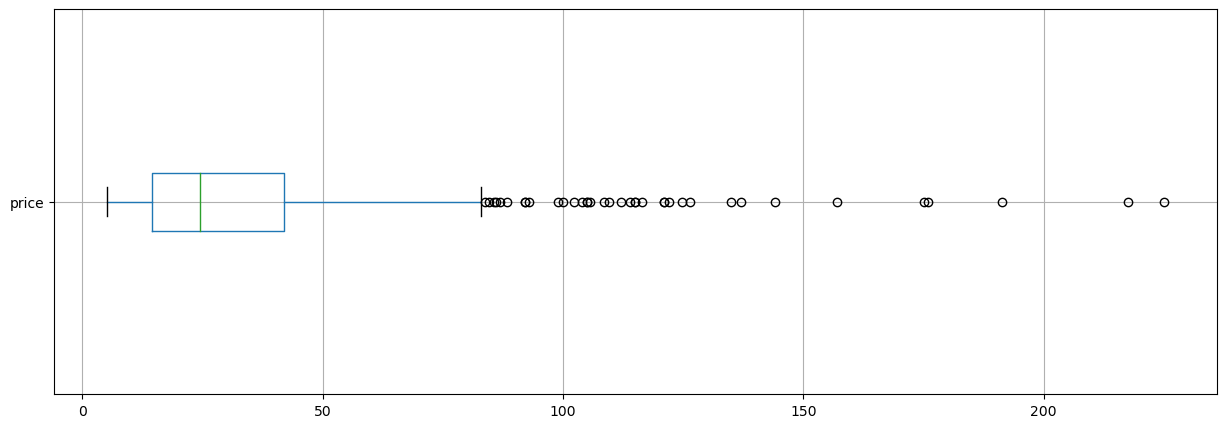

<Figure size 1000x500 with 0 Axes>

<AxesSubplot:>

(0.0, 500.0)

(0.0, 300.0)

Text(0.5, 0, 'Le prix')

Text(0, 0.5, 'Le nombres de produits')

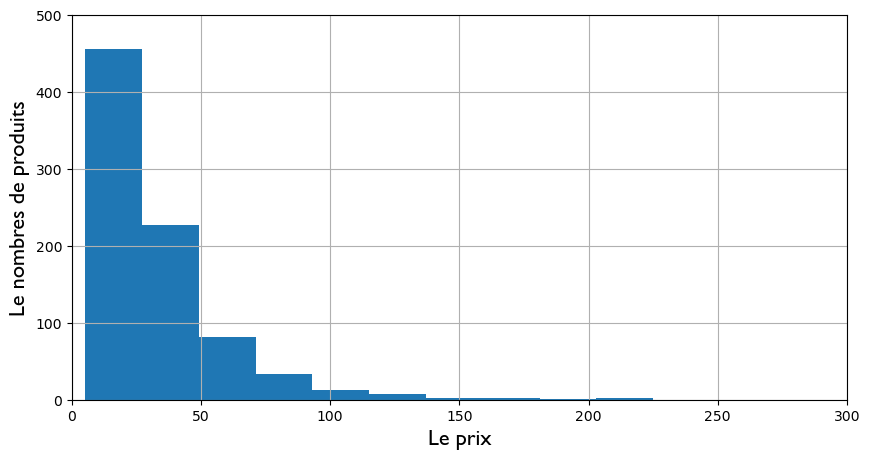

In [51]:
# Analyse de la colonne prix  
# Calcul du prix moyen
print('La moyenne des prix est : ', round(web_erp['price'].mean(), 2)) # Le prix moyen de vente este de 32.42

# Calcul de la medianne
print('La medianne des prix : ', round(web_erp['price'].median(), 2)) # La valeur medianne des bouteilles est de 24.4

# Calcul de la variance empirique
print('La variance empirique est : ', round(web_erp['price'].var(ddof=0), 2)) # La variance corrigé est de 717.15

# Calcul de l'ecart type
print("L'écart type est de : ", round(web_erp['price'].std(), 2)) # L'écart type est 26.8

# Le coefficient de variation 
print("Le coeficient de variation est : ", round(web_erp['price'].std()/web_erp['price'].mean(), 2))

# Le skewness empirique, la distrubition est étalée a doite
print("Le skewness empirique est : ", round(web_erp['price'].skew(), 2)) 


# Calcul de kurtosis de notre variable prix
print("Le kurtosis emipique est : ", round(web_erp['price'].kurtosis(), 2)) 


# L'écart interquartille pour calculer la distribution des valeurs
web_erp.boxplot(column='price', vert=False, figsize = (15,5))
plt.show()

#Le histogramme des prix
plt.figure(figsize=(10,5))
web_erp["price"].hist()
plt.ylim(0, 500)
plt.xlim(0, 300)
plt.xlabel("Le prix", fontname='Gill Sans MT', fontsize=16)
plt.ylabel("Le nombres de produits", fontname='Gill Sans MT', fontsize=16)
plt.show()

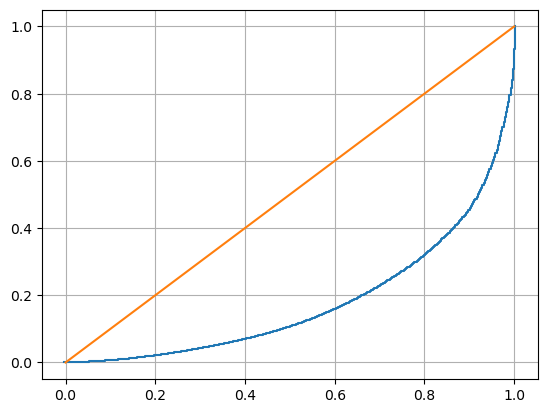

L'indicateur Gini est de :  0.64


In [52]:
# Le garphique qui montre comment chaque article participe au ciffre d'affaire global
# Calcul de la courbe de Lorenz :

montant = web_erp_groupe[web_erp_groupe['ca'] > 0]
n = len(montant['ca'])
lorenz = np.cumsum(np.sort(montant['ca'])/ montant['ca'].sum())
lorenz = np.append([0], lorenz)
xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
plt.plot(xaxis, lorenz, drawstyle = 'steps-post')
plt.plot([0,1], [0,1])
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

AUC = (lorenz.sum() - lorenz[-1]/2 - lorenz[0]/2)/n
S = 0.5 - AUC 
gini = 2*S
print("L'indicateur Gini est de : ", round(gini, 2))



In [53]:
# Le calcull de Z-score
variabila = stats.zscore(web_erp['price'])
print(variabila)

nouveaudf = web_erp.loc[abs(stats.zscore(web_erp['price'])) > 2.58, :]
nouveaudf.sort_values('price', ascending = False )
display(nouveaudf.shape)

0     -0.276914
1     -0.306787
2      0.070366
3     -0.433749
4     -0.683940
         ...   
820   -0.508433
821   -0.191027
822    0.245872
823   -0.728750
824   -0.220901
Name: price, Length: 825, dtype: float64


,index,id_web,total_sales,post_date,post_author,post_title,post_name,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge_erp_liaison,_merge,ca
200,200,15940,5.0,2018-03-02 10:30:04,2.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,champagne-egly-ouriet-grand-cru-millesime-2008,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,both,1125.0
426,426,14581,0.0,2018-07-17 09:45:39,2.0,David Duband Charmes-Chambertin Grand Cru 2014,david-duband-charmes-chambertin-grand-cru-2014,https://www.bottle-neck.fr/?post_type=product&...,5001,1,217.5,20,instock,both,both,0.0
587,587,14983,3.0,2019-03-28 10:21:36,2.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,https://www.bottle-neck.fr/?post_type=product&...,5892,1,191.3,10,instock,both,both,573.9
219,219,3510,13.0,2018-03-22 11:21:05,2.0,Cognac Frapin VIP XO,cognac-frapin-vip-xo,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,both,2288.0
553,553,15185,0.0,2019-03-13 14:43:22,2.0,Camille Giroud Clos de Vougeot 2016,camille-giroud-clos-de-vougeot-2016,https://www.bottle-neck.fr/?post_type=product&...,5767,1,175.0,12,instock,both,both,0.0
222,222,7819,0.0,2018-03-22 11:42:48,2.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,https://www.bottle-neck.fr/?post_type=product&...,4406,1,157.0,3,instock,both,both,0.0
725,725,NaN,NaN,NaT,NaN,NaN,NaN,NaN,4594,1,144.0,0,outofstock,both,right_only,NaN
382,382,14220,5.0,2018-05-15 10:23:41,2.0,Domaine Des Croix Corton Charlemagne Grand Cru...,domaine-des-croix-corton-charlemagne-grand-cru...,https://www.bottle-neck.fr/?post_type=product&...,4904,1,137.0,13,instock,both,both,685.0
642,642,14923,2.0,2019-06-28 17:22:27,2.0,Champagne Gosset Célébris Vintage 2007,champagne-gosset-celebris-vintage-2007,https://www.bottle-neck.fr/?post_type=product&...,6126,1,135.0,10,instock,both,both,270.0
202,202,12589,11.0,2018-03-02 10:46:10,2.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,https://www.bottle-neck.fr/?post_type=product&...,4355,1,126.5,2,instock,both,both,1391.5


(26, 16)

In [54]:
# Detection des outliers avec la methode des interquartilles
Q1 = np.quantile(web_erp['price'], 0.25)
Q3 = np.quantile(web_erp['price'], 0.75)
IQR = Q3 - Q1
limit_inf = Q1 - (1.5*IQR)
limit_sup = Q3 + (1.5*IQR)
display(web_erp.loc[web_erp['price'] < limit_inf, :])
display(web_erp.loc[web_erp['price'] > limit_sup, :])
# Les outliers semble être juste des vins grand gru et champagnes qui sont effectivement très chers, a verifier 

,index,id_web,total_sales,post_date,post_author,post_title,post_name,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge_erp_liaison,_merge,ca


,index,id_web,total_sales,post_date,post_author,post_title,post_name,guid,product_id,onsale_web,price,stock_quantity,stock_status,_merge_erp_liaison,_merge,ca
64,64,15382,0.0,2018-02-13 11:08:45,2.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,zind-humbrecht-riesling-gc-rangen-thann-clos-s...,https://www.bottle-neck.fr/?post_type=product&...,4115,1,100.0,11,instock,both,both,0.0
66,66,11668,0.0,2018-02-13 11:43:55,2.0,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,https://www.bottle-neck.fr/?post_type=product&...,4132,1,88.4,5,instock,both,both,0.0
200,200,15940,5.0,2018-03-02 10:30:04,2.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,champagne-egly-ouriet-grand-cru-millesime-2008,https://www.bottle-neck.fr/?post_type=product&...,4352,1,225.0,0,outofstock,both,both,1125.0
202,202,12589,11.0,2018-03-02 10:46:10,2.0,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,https://www.bottle-neck.fr/?post_type=product&...,4355,1,126.5,2,instock,both,both,1391.5
206,206,13853,1.0,2018-03-02 11:11:48,2.0,Champagne Larmandier-Bernier Grand Cru Les Che...,champagne-larmandier-bernier-grand-cru-vieille...,https://www.bottle-neck.fr/?post_type=product&...,4359,1,85.6,0,outofstock,both,both,85.6
219,219,3510,13.0,2018-03-22 11:21:05,2.0,Cognac Frapin VIP XO,cognac-frapin-vip-xo,https://www.bottle-neck.fr/?post_type=product&...,4402,1,176.0,8,instock,both,both,2288.0
220,220,3507,2.0,2018-03-22 11:32:55,2.0,Cognac Frapin Château de Fontpinot XO,cognac-frapin-fontpinot-xo,https://www.bottle-neck.fr/?post_type=product&...,4404,1,108.5,2,instock,both,both,217.0
222,222,7819,0.0,2018-03-22 11:42:48,2.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,cognac-frapin-chateau-de-fontpinot-1989-20-ans,https://www.bottle-neck.fr/?post_type=product&...,4406,1,157.0,3,instock,both,both,0.0
223,223,3509,1.0,2018-03-22 11:49:53,2.0,Cognac Frapin Cigar Blend,cognac-frapin-cigar-blend,https://www.bottle-neck.fr/?post_type=product&...,4407,1,104.0,6,instock,both,both,104.0
228,228,12857,0.0,2018-04-12 17:56:13,2.0,Château de Meursault Puligny-Montrachet 1er Cr...,chateau-de-puligny-montrachet-1cru-champ-canet...,https://www.bottle-neck.fr/?post_type=product&...,4582,1,109.6,7,instock,both,both,0.0
